# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Variables to save while performing a weather check
lats = []
longs = []
max_temp = []
humid = []
cloud = []
wind_speed = []
countries = []
dates = []
found_cities = []
cycle_count = 1

# Loop through cities and add the json values to the lists
for x in cities:
    #Using try, append the values if no errors
    try:
        #Store the values for the cities that have been found
        response = requests.get(query_url + x).json()
        lats.append(response['coord']['lat'])
        longs.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        found_cities.append(x)
        
        #Print a statement showing the search is successful
        print(f"Processing Record {cycle_count} of Set 1 | {x}")
    
    except:
        #If an error has been encountered 
        print("City not found. Skipping....")
        
    #Keep track of the cycle count
    cycle_count = cycle_count + 1


Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | tual
Processing Record 3 of Set 1 | busselton
City not found. Skipping....
Processing Record 5 of Set 1 | saint-marc
Processing Record 6 of Set 1 | nouadhibou
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | luderitz
City not found. Skipping....
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | batticaloa
Processing Record 13 of Set 1 | egvekinot
Processing Record 14 of Set 1 | kaitangata
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | hasaki
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | saint-pierre
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | igarka
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | bluff
Processing Record 23 of Set 1 | mackenzie
City not found. Skipping....
Processing Record 25 of Set 1 | lukashin
Processing Record 2

Processing Record 202 of Set 1 | semnan
Processing Record 203 of Set 1 | ust-nera
Processing Record 204 of Set 1 | port hardy
Processing Record 205 of Set 1 | panukulan
Processing Record 206 of Set 1 | ulagan
Processing Record 207 of Set 1 | bealanana
City not found. Skipping....
Processing Record 209 of Set 1 | bima
Processing Record 210 of Set 1 | dingle
Processing Record 211 of Set 1 | turukhansk
Processing Record 212 of Set 1 | cabo san lucas
Processing Record 213 of Set 1 | clyde river
Processing Record 214 of Set 1 | arak
Processing Record 215 of Set 1 | pevek
Processing Record 216 of Set 1 | alice springs
Processing Record 217 of Set 1 | panjab
Processing Record 218 of Set 1 | aripuana
Processing Record 219 of Set 1 | uruacu
Processing Record 220 of Set 1 | cody
Processing Record 221 of Set 1 | athabasca
Processing Record 222 of Set 1 | derzhavinsk
Processing Record 223 of Set 1 | harper
Processing Record 224 of Set 1 | colmenar viejo
Processing Record 225 of Set 1 | san patrici

Processing Record 402 of Set 1 | yanam
Processing Record 403 of Set 1 | saint-joseph
Processing Record 404 of Set 1 | kashan
Processing Record 405 of Set 1 | namibe
Processing Record 406 of Set 1 | revda
Processing Record 407 of Set 1 | morondava
Processing Record 408 of Set 1 | springbok
Processing Record 409 of Set 1 | moranbah
Processing Record 410 of Set 1 | te anau
Processing Record 411 of Set 1 | dukat
Processing Record 412 of Set 1 | broken hill
Processing Record 413 of Set 1 | menomonie
Processing Record 414 of Set 1 | prince rupert
Processing Record 415 of Set 1 | lamballe
Processing Record 416 of Set 1 | oeiras do para
Processing Record 417 of Set 1 | libenge
Processing Record 418 of Set 1 | coahuayana
Processing Record 419 of Set 1 | narrabri
Processing Record 420 of Set 1 | nhulunbuy
Processing Record 421 of Set 1 | tigzirt
Processing Record 422 of Set 1 | belaya gora
Processing Record 423 of Set 1 | pacific grove
Processing Record 424 of Set 1 | amahai
Processing Record 42

Processing Record 603 of Set 1 | silver city
Processing Record 604 of Set 1 | gavle
Processing Record 605 of Set 1 | tonj
City not found. Skipping....
Processing Record 607 of Set 1 | dasoguz
Processing Record 608 of Set 1 | oudtshoorn
Processing Record 609 of Set 1 | los llanos de aridane
Processing Record 610 of Set 1 | balkanabat
Processing Record 611 of Set 1 | stornoway
Processing Record 612 of Set 1 | liberal
Processing Record 613 of Set 1 | mandera
Processing Record 614 of Set 1 | hervey bay
Processing Record 615 of Set 1 | dongsheng
Processing Record 616 of Set 1 | pointe michel
Processing Record 617 of Set 1 | farafangana
City not found. Skipping....
Processing Record 619 of Set 1 | waverley
Processing Record 620 of Set 1 | wageningen
Processing Record 621 of Set 1 | atherton
Processing Record 622 of Set 1 | tianpeng
Processing Record 623 of Set 1 | manicore
Processing Record 624 of Set 1 | copiapo
Processing Record 625 of Set 1 | geraldton
Processing Record 626 of Set 1 | ber

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
#Create a dataframe from the gathered data
weather_df = pd.DataFrame({
    "City": found_cities,
    "Lat": lats,
    "Lng": longs,
    "Max Temp": max_temp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind_speed,
    "Country": countries,
    "Date": dates
})

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.15,-53.15,7.00,70,100,13.90,CL,1608182132
1,tual,-5.67,-5.67,29.77,76,56,8.75,ID,1608182132
2,busselton,-33.65,-33.65,24.44,42,0,1.34,AU,1608182132
3,saint-marc,19.11,19.11,23.54,70,16,2.39,HT,1608182132
4,nouadhibou,20.93,20.93,17.00,77,0,12.30,MR,1608182132


In [37]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,5.850000e+02
mean,21.776222,21.776222,8.864034,75.964103,55.193162,3.497197,1.608182e+09
std,33.411923,33.411923,17.727510,18.840092,39.189109,2.487563,1.196376e+02
min,-54.800000,-54.800000,-44.000000,1.000000,0.000000,0.130000,1.608182e+09
25%,-6.210000,-6.210000,-3.070000,68.000000,13.000000,1.780000,1.608182e+09
50%,27.280000,27.280000,13.810000,81.000000,69.000000,2.750000,1.608182e+09
75%,50.700000,50.700000,23.260000,89.000000,93.000000,4.680000,1.608182e+09
max,77.480000,77.480000,40.000000,100.000000,100.000000,15.900000,1.608182e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
#Since the max of Humidity is 100, there are no cities with humidity greater than 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

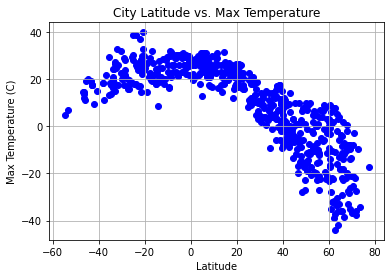

In [53]:
#Create a scatter plot for city latitude vs. max temperature
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], color='Blue', marker='o')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

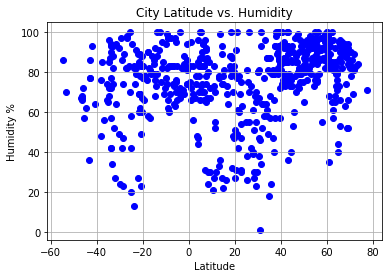

In [55]:
#Create a scatter plot for city latitude vs. humidity
plt.scatter(weather_df['Lat'], weather_df['Humidity'], color='Blue', marker='o')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

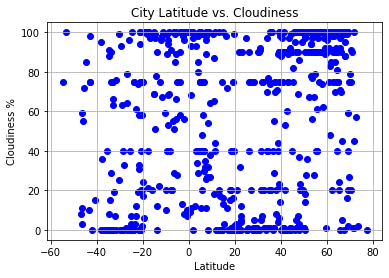

In [56]:
#Create a scatter plot for city latitude vs. Cloudiness
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], color='Blue', marker='o')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

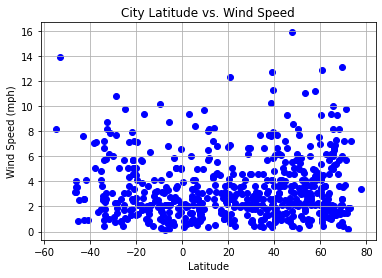

In [58]:
#Create a scatter plot for city latitude vs. wind speed
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], color='Blue', marker='o')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


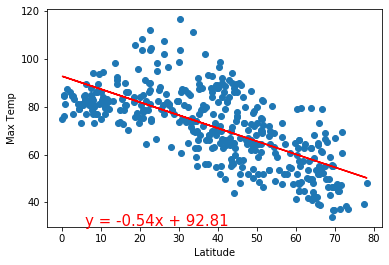

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


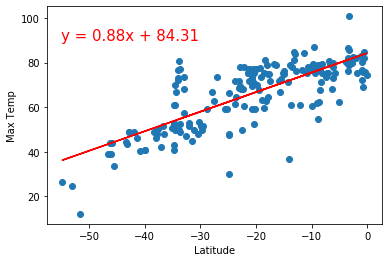

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


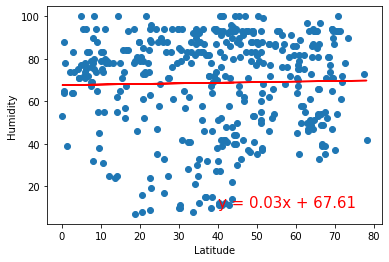

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


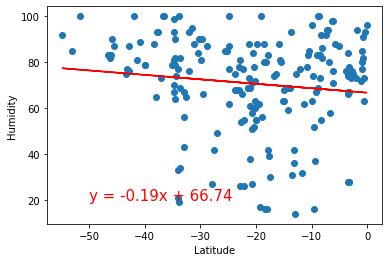

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


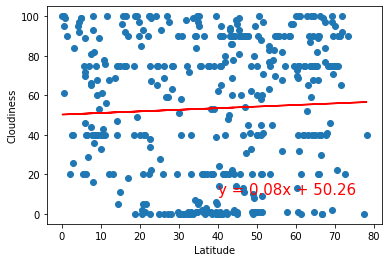

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


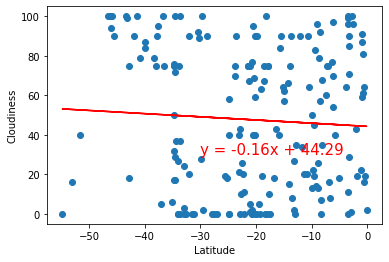

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


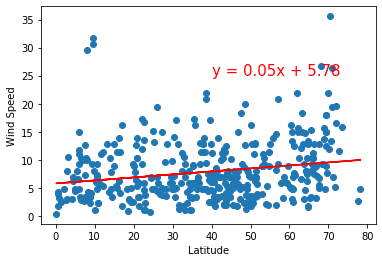

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


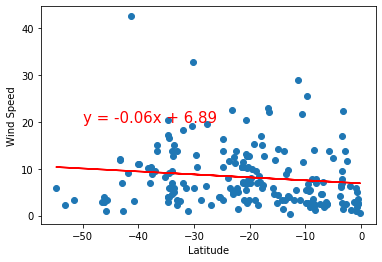